# Python for Data Science

### Dependencies
- Python=3.6
- Pandas
- Jupyter
- Matplotlib

## Introduction
We are going to analyze the New York [Vehicle Collision Dataset](https://www.kaggle.com/new-york-city/nypd-motor-vehicle-collisions#nypd-motor-vehicle-collisions.csv). 
The dataset has been unzipped and the resulting size is around 350MB.

**Check file size and see if a header is present.**

In [1]:
!ls -l  nypd-motor-vehicle-collisions.csv

-rw-rw-r--. 1 farhanhubble farhanhubble 360338035 Jun 30 00:10 nypd-motor-vehicle-collisions.csv


In [2]:
!head -1 nypd-motor-vehicle-collisions.csv

DATE,TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED,CONTRIBUTING FACTOR VEHICLE 1,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,UNIQUE KEY,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5


## Load and Clean Data

**Load the Dataset**

In [3]:
import pandas as pd

In [31]:
data = pd.read_csv('./nypd-motor-vehicle-collisions.csv',header=0)

/home/farhanhubble/anaconda3/envs/sapient/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [32]:
print('Data shape:',data.shape)
data.head()

Data shape: (1294012, 29)


,DATE,TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,UNIQUE KEY,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,2018-06-26T00:00:00,0:00,BROOKLYN,11215,40.667470,-73.979290,"{'longitude': '-73.97929', 'needs_recoding': F...",NaN,NaN,506 7 STREET,...,Unspecified,NaN,NaN,NaN,3929455,Station Wagon/Sport Utility Vehicle,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN
1,2018-06-26T00:00:00,0:00,BROOKLYN,11218,40.641113,-73.966324,"{'longitude': '-73.966324', 'needs_recoding': ...",NaN,NaN,358 ARGYLE ROAD,...,Unspecified,NaN,NaN,NaN,3929457,Station Wagon/Sport Utility Vehicle,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN
2,2018-06-26T00:00:00,0:00,MANHATTAN,10065,40.766666,-73.967070,"{'longitude': '-73.96707', 'needs_recoding': F...",EAST 65 STREET,PARK AVENUE,NaN,...,Unspecified,NaN,NaN,NaN,3930150,Sedan,Sedan,NaN,NaN,NaN
3,2018-06-26T00:00:00,0:00,NaN,NaN,40.826275,-73.859710,"{'longitude': '-73.85971', 'needs_recoding': F...",BRUCKNER BOULEVARD,WHITE PLAINS ROAD,NaN,...,Unspecified,NaN,NaN,NaN,3929327,Sedan,Sedan,NaN,NaN,NaN
4,2018-06-26T00:00:00,0:00,NaN,NaN,40.699265,-73.727170,"{'longitude': '-73.72717', 'needs_recoding': F...",CROSS ISLAND PARKWAY,NaN,NaN,...,Unspecified,NaN,NaN,NaN,3929108,Station Wagon/Sport Utility Vehicle,Sedan,NaN,NaN,NaN


**Drop some not-so-useful columns**

In [34]:
data.drop(labels=['ZIP CODE',\
                  'LOCATION',\
                  'ON STREET NAME',\
                  'CROSS STREET NAME',\
                  'OFF STREET NAME',\
                  'CONTRIBUTING FACTOR VEHICLE 2',\
                  'CONTRIBUTING FACTOR VEHICLE 3',\
                  'CONTRIBUTING FACTOR VEHICLE 4',\
                  'CONTRIBUTING FACTOR VEHICLE 5'],axis=1,inplace=True)

In [35]:
print('Data shape:',data.shape)
data.head()

Data shape: (1294012, 20)


,DATE,TIME,BOROUGH,LATITUDE,LONGITUDE,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED,CONTRIBUTING FACTOR VEHICLE 1,UNIQUE KEY,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,2018-06-26T00:00:00,0:00,BROOKLYN,40.667470,-73.979290,0,0,0,0,0,0,0,0,Passing Too Closely,3929455,Station Wagon/Sport Utility Vehicle,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN
1,2018-06-26T00:00:00,0:00,BROOKLYN,40.641113,-73.966324,0,0,0,0,0,0,0,0,Unspecified,3929457,Station Wagon/Sport Utility Vehicle,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN
2,2018-06-26T00:00:00,0:00,MANHATTAN,40.766666,-73.967070,0,0,0,0,0,0,0,0,Tire Failure/Inadequate,3930150,Sedan,Sedan,NaN,NaN,NaN
3,2018-06-26T00:00:00,0:00,NaN,40.826275,-73.859710,0,0,0,0,0,0,0,0,Turning Improperly,3929327,Sedan,Sedan,NaN,NaN,NaN
4,2018-06-26T00:00:00,0:00,NaN,40.699265,-73.727170,0,0,0,0,0,0,0,0,Driver Inattention/Distraction,3929108,Station Wagon/Sport Utility Vehicle,Sedan,NaN,NaN,NaN


**Convert first column to date only.**

In [43]:
data.DATE = pd.to_datetime(data.DATE)

In [45]:
data.head()

,DATE,TIME,BOROUGH,LATITUDE,LONGITUDE,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED,CONTRIBUTING FACTOR VEHICLE 1,UNIQUE KEY,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,2018-06-26,0:00,BROOKLYN,40.667470,-73.979290,0,0,0,0,0,0,0,0,Passing Too Closely,3929455,Station Wagon/Sport Utility Vehicle,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN
1,2018-06-26,0:00,BROOKLYN,40.641113,-73.966324,0,0,0,0,0,0,0,0,Unspecified,3929457,Station Wagon/Sport Utility Vehicle,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN
2,2018-06-26,0:00,MANHATTAN,40.766666,-73.967070,0,0,0,0,0,0,0,0,Tire Failure/Inadequate,3930150,Sedan,Sedan,NaN,NaN,NaN
3,2018-06-26,0:00,NaN,40.826275,-73.859710,0,0,0,0,0,0,0,0,Turning Improperly,3929327,Sedan,Sedan,NaN,NaN,NaN
4,2018-06-26,0:00,NaN,40.699265,-73.727170,0,0,0,0,0,0,0,0,Driver Inattention/Distraction,3929108,Station Wagon/Sport Utility Vehicle,Sedan,NaN,NaN,NaN


**Check which columns have NaN**

In [52]:
data.isnull().any()

DATE                             False
TIME                             False
BOROUGH                           True
LATITUDE                          True
LONGITUDE                         True
NUMBER OF PERSONS INJURED        False
NUMBER OF PERSONS KILLED         False
NUMBER OF PEDESTRIANS INJURED    False
NUMBER OF PEDESTRIANS KILLED     False
NUMBER OF CYCLIST INJURED        False
NUMBER OF CYCLIST KILLED         False
NUMBER OF MOTORIST INJURED       False
NUMBER OF MOTORIST KILLED        False
CONTRIBUTING FACTOR VEHICLE 1     True
UNIQUE KEY                       False
VEHICLE TYPE CODE 1               True
VEHICLE TYPE CODE 2               True
VEHICLE TYPE CODE 3               True
VEHICLE TYPE CODE 4               True
VEHICLE TYPE CODE 5               True
dtype: bool

**Cannot afford NaN in Latitude/Longitude, drop such rows**

In [67]:
print(data.LONGITUDE.isnull().sum(),data.LONGITUDE.isnull().sum())

220121 220121


In [68]:
data.dropna(axis=0,how='any',subset=['LATITUDE','LONGITUDE'],inplace=True)

In [69]:
print(data.shape)
data.head()

(1073891, 20)


,DATE,TIME,BOROUGH,LATITUDE,LONGITUDE,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED,CONTRIBUTING FACTOR VEHICLE 1,UNIQUE KEY,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,2018-06-26,0:00,BROOKLYN,40.667470,-73.979290,0,0,0,0,0,0,0,0,Passing Too Closely,3929455,Station Wagon/Sport Utility Vehicle,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN
1,2018-06-26,0:00,BROOKLYN,40.641113,-73.966324,0,0,0,0,0,0,0,0,Unspecified,3929457,Station Wagon/Sport Utility Vehicle,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN
2,2018-06-26,0:00,MANHATTAN,40.766666,-73.967070,0,0,0,0,0,0,0,0,Tire Failure/Inadequate,3930150,Sedan,Sedan,NaN,NaN,NaN
3,2018-06-26,0:00,NaN,40.826275,-73.859710,0,0,0,0,0,0,0,0,Turning Improperly,3929327,Sedan,Sedan,NaN,NaN,NaN
4,2018-06-26,0:00,NaN,40.699265,-73.727170,0,0,0,0,0,0,0,0,Driver Inattention/Distraction,3929108,Station Wagon/Sport Utility Vehicle,Sedan,NaN,NaN,NaN


**Drop rows where all vehicle data is NaN**

In [83]:
data.dropna(axis=0,how='all',subset=['VEHICLE TYPE CODE 1', 'VEHICLE TYPE CODE 2', 'VEHICLE TYPE CODE 3', 'VEHICLE TYPE CODE 4', 'VEHICLE TYPE CODE 5'], inplace=True)

In [84]:
print(data.shape)
data.head()

(1064990, 20)


,DATE,TIME,BOROUGH,LATITUDE,LONGITUDE,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED,CONTRIBUTING FACTOR VEHICLE 1,UNIQUE KEY,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,2018-06-26,0:00,BROOKLYN,40.667470,-73.979290,0,0,0,0,0,0,0,0,Passing Too Closely,3929455,Station Wagon/Sport Utility Vehicle,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN
1,2018-06-26,0:00,BROOKLYN,40.641113,-73.966324,0,0,0,0,0,0,0,0,Unspecified,3929457,Station Wagon/Sport Utility Vehicle,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN
2,2018-06-26,0:00,MANHATTAN,40.766666,-73.967070,0,0,0,0,0,0,0,0,Tire Failure/Inadequate,3930150,Sedan,Sedan,NaN,NaN,NaN
3,2018-06-26,0:00,NaN,40.826275,-73.859710,0,0,0,0,0,0,0,0,Turning Improperly,3929327,Sedan,Sedan,NaN,NaN,NaN
4,2018-06-26,0:00,NaN,40.699265,-73.727170,0,0,0,0,0,0,0,0,Driver Inattention/Distraction,3929108,Station Wagon/Sport Utility Vehicle,Sedan,NaN,NaN,NaN


**Drop rows where borough is unknown**. 

In [86]:
data.dropna(axis=0,subset=['BOROUGH'], inplace=True)

In [87]:
print(data.shape)
data.head()

(877419, 20)


,DATE,TIME,BOROUGH,LATITUDE,LONGITUDE,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED,CONTRIBUTING FACTOR VEHICLE 1,UNIQUE KEY,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,2018-06-26,0:00,BROOKLYN,40.667470,-73.979290,0,0,0,0,0,0,0,0,Passing Too Closely,3929455,Station Wagon/Sport Utility Vehicle,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN
1,2018-06-26,0:00,BROOKLYN,40.641113,-73.966324,0,0,0,0,0,0,0,0,Unspecified,3929457,Station Wagon/Sport Utility Vehicle,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN
2,2018-06-26,0:00,MANHATTAN,40.766666,-73.967070,0,0,0,0,0,0,0,0,Tire Failure/Inadequate,3930150,Sedan,Sedan,NaN,NaN,NaN
5,2018-06-26,0:00,BRONX,40.844788,-73.891680,1,0,0,0,1,0,0,0,Driver Inattention/Distraction,3930216,Sedan,Bike,NaN,NaN,NaN
6,2018-06-26,0:00,BROOKLYN,40.606007,-73.955830,1,0,0,0,0,0,1,0,Driver Inattention/Distraction,3929796,Pick-up Truck,Sedan,NaN,NaN,NaN


## Explore the data.

**Column ranges.**

In [98]:
data.DATE.dt.year.unique()

array([2018, 2017, 2016, 2015, 2014, 2013, 2012])

In [106]:
data.TIME = pd.to_datetime(data.TIME)

In [111]:
data.TIME.dt.hour.hist()

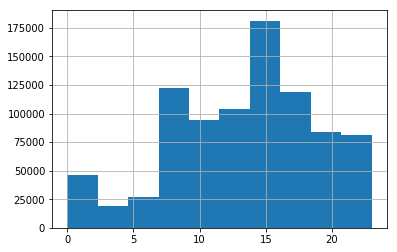

In [114]:
import matplotlib.pyplot as plt
data.TIME.dt.hour.hist()
plt.show()

In [116]:
data['NUMBER OF PERSONS INJURED'].describe()

count    877419.000000
mean          0.247372
std           0.634399
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          43.000000
Name: NUMBER OF PERSONS INJURED, dtype: float64